## Data Cleaning 

The point of this project is to continue building proficiency in the data analytics life cycle with data preparation skills. I address exploring, transforming, and imputing data as well as handling outliers. I will write code to manipulate, structure, and clean data as well as to reduce features in data sets.

## Competencies

__Predicting Obstacles in Data Analysis__<br>
Predicts potential obstacles in data.<br>

__Preparing Data for Analysis__ <br>
Prepares data for analysis to address organizational needs. <br>

__Manipulating Data for Analysis__<br>
Writes reusable code to manipulate and clean data in preparation for analysis

## Write Up 

__Research Question__ <br>
Which variables are most important when assessing the risk of patients being re-administered to the hospital?

__Plan to assess the quality of data__<br>
I plan to address the methods and techniques in cleaning the medical data set by focusing on duplicates, missing values, outliers, and the re-expression of categorical variables. Duplicates will be addressed by using the .duplicated() function in python combined with the .value_counts() function. First, the .duplicated() function uses a Boolean response to indicate is duplicates exist (True) or do not exist (False). The only issue with using this function is that it is limited to only the first and last 5 values which leaves out a large amount of the data set. This issue is solved through the combination of .duplicated() and .value_counts() functions. <br>

Missing values will be detected through the .isnull().sum() functions which gives an exhaustive list of all variables and the number of null values found. I have also utilized a filter to get rid of those columns that have 0 null values found to zoom in on those variables that need to be addressed. This filter was created using the not equal operator (!=) and by putting it equal to 0 we can get rid of those variables that are already cleaned in terms of missing values. <br>

Outliers will be detected using boxplots. Boxplots will be created in python using the matplotlib package and the .boxplot() function. The boxplot indicates outliers through dots outside of the boxplot whiskers. <br>

Lastly, re-expression of categorical variables will be detected through a few functions including .select_dtypes() and a filter created by .nunique() to show only qualitative variables that have less than 3 unique values to show those variables that have yes or no values. 

__Justification of Approach__ <br>
With duplicates in data, we are exposed to potential integrity threats including causing inaccuracies and skewing the data with unnecessary inflation. For this reason, it is necessary to address duplicates in our data. The approach that was used is justified due to providing Boolean values that indicate true or false for duplicate values (Nehme et al, n.d.). <br>

Missing values can also negatively influence the data through possible integrity threats like inaccuracies and inflation or deflation of values. The approach that was used is justified due to the aggregation of missing values for each variable. This allows for the proper missing values and variables to be addressed. <br>

Outliers, “can create analytic challenges by distorting individual measures or relationships and potentially leading to mistaken conclusions (Western Governors University, n.d.). The approach that was used is the boxplot method. This method shows the highest and lowest values that are reasonable and anything that goes beyond that is an outlier. (Western Governors University, n.d.) <br>

The re-expression of categorical variables is important due to the risk of leaving them and having potentially incorrect interpretations. This is because, “leaving categorical fields as is data algorithms wouldn’t know that one value is larger than another.”  (Chantal, 2019) Also, it is important to note that we have a few variables that already have 1 and 0 values instead of yes or no values. This is important to make sure that the data stays consistent across all variables. The approach that is used to assess the re-expression of categorical values is justified due to the infallible filter showing only object/string data types that represents qualitative variables explicitly. <br>

## Code

In [5]:
# Importing packages needed 
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [6]:
# Importing medical data csv and creating medical_data DataFrame
medical_data = pd.read_csv("C:/Users/Makayla Avendano/Desktop/medical_raw_data.csv")

In [9]:
# Looking at columns, non-null counts and data types
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

__Duplicates__<br>
When starting the data cleaning process, the first issue I addressed was duplicates. After using the .duplicated() function, I found that there were no duplicated values within the data set. 

In [10]:
# Duplicates - Detection 
# Looking to verify duplicate values
medical_duplicates = medical_data.duplicated()
print(medical_duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool


In [11]:
# Looking at the count of duplicate values
print(medical_duplicates.value_counts())

False    10000
Name: count, dtype: int64


__Missing Values__<br>
Looking at the missing values of the data set a total of 7 variables were missing values. The missing variables and the sum of all missing values are shown in the code output below. 

In [12]:
# Missing Values - Detection 
# Looking at the sum of all null values within each column
medical_data.isnull().sum()

Unnamed: 0               0
CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
A

In [13]:
# Filter non-null values out to show just the columns that have null values
medical_null = medical_data.isnull().sum()
medical_null_filtered = medical_null[medical_null !=0]
print(medical_null_filtered)

Children        2588
Age             2414
Income          2464
Soft_drink      2467
Overweight       982
Anxiety          984
Initial_days    1056
dtype: int64


__Treatment of Missing Values__ <br>
Missing values used the method called univariate statistical imputation. Univariate statistical imputation was used due to the added benefit of not reducing the sample size and the simple-to-understand procedure. Imputation was used to replace the current missing values with the mean, median, and mode based on the distribution of the data. The mean was replaced by variables that exhibit a uniform distribution including the age variable. The median was replaced by variables that exhibit a skewed distribution or a bi-modal distribution including the variables children, income, and initial days. Lastly, the median replaced categorical values along with Boolean values which include the variables soft drink, overweight, and anxiety. By using the histogram, mean, and median values before and after the replacement, we made sure the distribution of the data was not affected substantially. The soft drink variable only had categorical answers which was replaced with the mode of the variable. 

(array([1880., 1858., 1094., 1113.,  739.,  126.,  145.,  154.,  157.,
         146.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

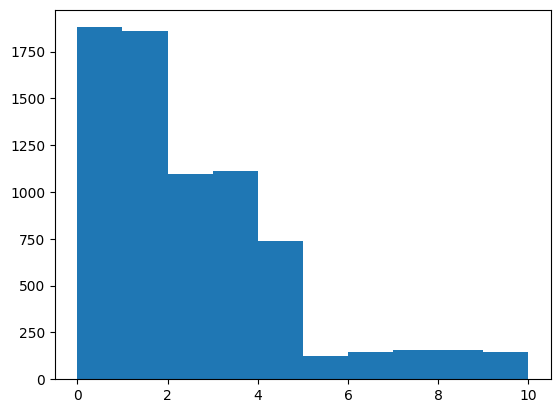

In [14]:
# Next we need to treat the missing values for the 7 variables above 
# 1. Examine Distribution
plt.hist(medical_data['Children'])

In [15]:
# 2. Examine Mean and median 
average_amount_children = medical_data['Children'].mean()
median_amount_children = medical_data['Children'].median()

print("Children average", average_amount_children)
print("Children median", median_amount_children)

Children average 2.0982191041554237
Children median 1.0


In [16]:
# 3. Perform imputation
medical_data['Children'].fillna(medical_data['Children'].median(), inplace = True)

# 4. Verification to show that isnull values are 0 
medical_data['Children'].isnull().sum()

0

(array([1880., 4446., 1094., 1113.,  739.,  126.,  145.,  154.,  157.,
         146.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

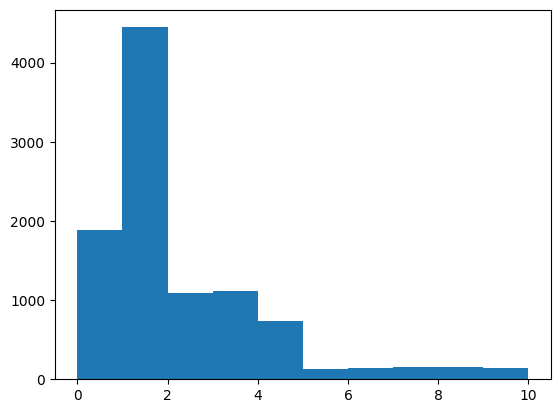

In [17]:
# 5. Verification to show that the adjustment did not alter the data too dramatically 
plt.hist(medical_data['Children'])

In [18]:
# 6. Verification of mean and median
average_amount_children = medical_data['Children'].mean()
median_children = medical_data['Children'].median()
print("Children", average_amount_children)
print("Children", median_children)

Children 1.814
Children 1.0


(array([823., 761., 746., 753., 746., 739., 730., 765., 710., 813.]),
 array([18. , 25.1, 32.2, 39.3, 46.4, 53.5, 60.6, 67.7, 74.8, 81.9, 89. ]),
 <BarContainer object of 10 artists>)

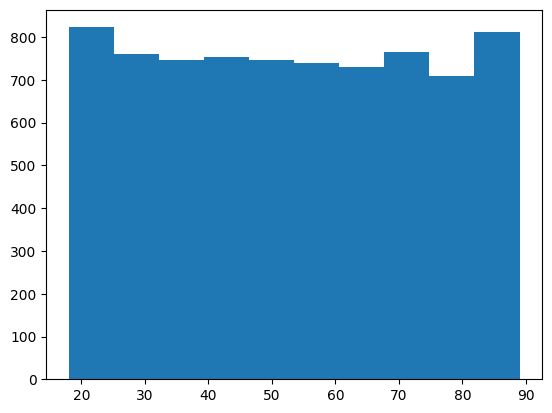

In [19]:
# Treat missing values
# 1. Examine Distribution
plt.hist(medical_data['Age'])

In [20]:
# 2. Examine Mean and median 
average_age = medical_data['Age'].mean()
median_age = medical_data['Age'].median()
print("Age average", average_age)
print("Age median", median_age)

Age average 53.29567624571579
Age median 53.0


In [21]:
# 3. Perform imputation
medical_data['Age'].fillna(medical_data['Age'].mean(), inplace = True)

# 4. Verification to show that isnull values are 0 
medical_data['Age'].isnull().sum()

0

(array([ 823.,  761.,  746.,  753., 3160.,  739.,  730.,  765.,  710.,
         813.]),
 array([18. , 25.1, 32.2, 39.3, 46.4, 53.5, 60.6, 67.7, 74.8, 81.9, 89. ]),
 <BarContainer object of 10 artists>)

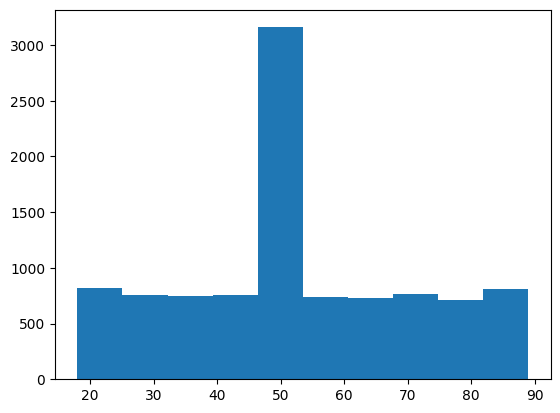

In [22]:
# 5. Verification to show that the adjustment did not alter the data too dramatically 
plt.hist(medical_data['Age'])

In [23]:
# 6. Verification of mean 
average_age = medical_data['Age'].mean()
median_age = medical_data['Age'].median()
print("Age", average_age)
print("Age", median_age)

Age 53.29567624571578
Age 53.29567624571579


(array([2068., 2526., 1532.,  790.,  340.,  156.,   67.,   34.,   12.,
          11.]),
 array([1.54080000e+02, 2.08635850e+04, 4.15730900e+04, 6.22825950e+04,
        8.29921000e+04, 1.03701605e+05, 1.24411110e+05, 1.45120615e+05,
        1.65830120e+05, 1.86539625e+05, 2.07249130e+05]),
 <BarContainer object of 10 artists>)

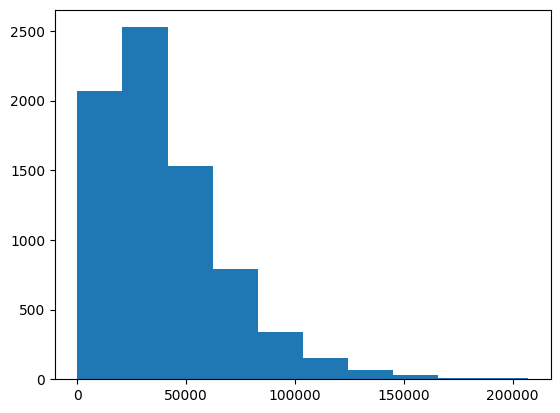

In [24]:
# Treat missing values
# 1. Examine Distribution
plt.hist(medical_data['Income'])

In [25]:
# 2. Examine Mean and median 
average_income = medical_data['Income'].mean()
median_income = medical_data['Income'].median()
print("Income average", average_income)
print("Income median", median_income)

Income average 40484.4382683121
Income median 33942.28


In [26]:
# 3. Perform imputation
medical_data['Income'].fillna(medical_data['Income'].median(), inplace = True)

# 4. Verification to show that isnull values are 0 
medical_data['Income'].isnull().sum()

0

(array([2068., 4990., 1532.,  790.,  340.,  156.,   67.,   34.,   12.,
          11.]),
 array([1.54080000e+02, 2.08635850e+04, 4.15730900e+04, 6.22825950e+04,
        8.29921000e+04, 1.03701605e+05, 1.24411110e+05, 1.45120615e+05,
        1.65830120e+05, 1.86539625e+05, 2.07249130e+05]),
 <BarContainer object of 10 artists>)

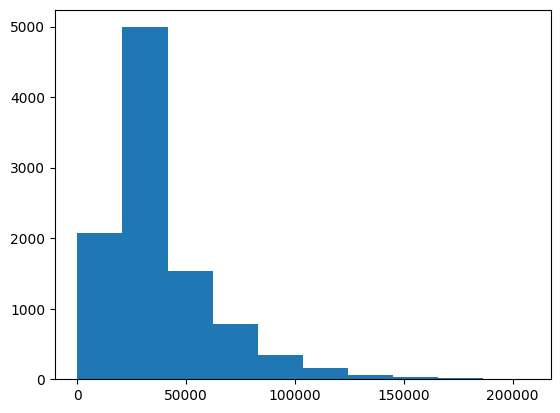

In [27]:
# 5. Verification to show that the adjustment did not alter the data too dramatically 
plt.hist(medical_data['Income'])

In [28]:
# 6. Verification of Mean and median 
average_income = medical_data['Income'].mean()
median_income = medical_data['Income'].median()
print("Income average", average_income)
print("Income median", median_income)

Income average 38872.450471000004
Income median 33942.28


In [29]:
# Soft drink has categorical values (yes/no) so we will use the mode to replace the nulls
medical_data['Soft_drink'] = medical_data['Soft_drink'].fillna(medical_data['Soft_drink'].mode()[0])
medical_data['Soft_drink'].isnull().sum()

0

(array([2623.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6395.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

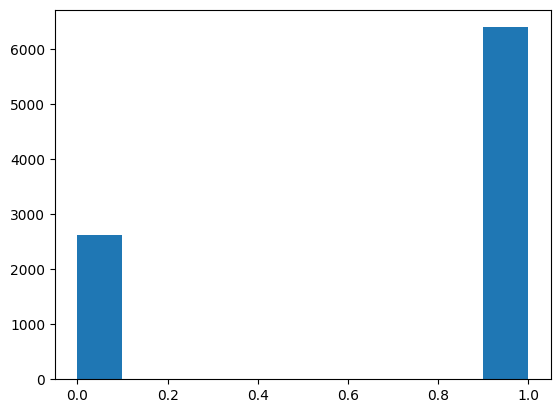

In [30]:
# Treat missing values
# 1. Examine Distribution
plt.hist(medical_data['Overweight'])

In [31]:
# 2. Examine Mean and median 
overweight_average = medical_data['Overweight'].mean()
overweight_median = medical_data['Overweight'].median()
print("Overweight average", overweight_average)
print("Overweight median", overweight_median)

Overweight average 0.7091372809935684
Overweight median 1.0


In [32]:
#3 Use the mode to change the null values 
medical_data['Overweight'] = medical_data['Overweight'].fillna(medical_data['Overweight'].mode()[0])
medical_data['Overweight'].isnull().sum()

0

(array([2623.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7377.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

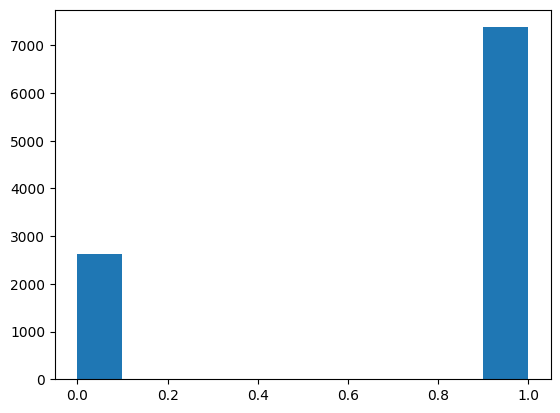

In [33]:
# 4. Verification to show that the adjustment did not alter the data too dramatically 
plt.hist(medical_data['Overweight'])

In [34]:
# 5. Verification of Mean and median 
average_income = medical_data['Overweight'].mean()
median_income = medical_data['Overweight'].median()
print("Overweight average", average_income)
print("Overweight median", median_income)

Overweight average 0.7377
Overweight median 1.0


(array([6110.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2906.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

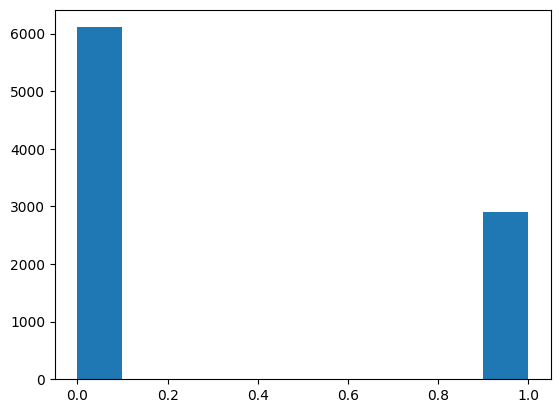

In [35]:
# Treat missing values
# 1. Examine Distribution
plt.hist(medical_data['Anxiety'])

In [36]:
# 2. Examine Mean and median 
anxiety_average = medical_data['Anxiety'].mean()
anxiety_median = medical_data['Anxiety'].median()
print("Anxiety average", anxiety_average)
print("Anxiety median", anxiety_median)

Anxiety average 0.3223158828748891
Anxiety median 0.0


In [37]:
#3 Use the mode to change the null values 
medical_data['Anxiety'] = medical_data['Anxiety'].fillna(medical_data['Anxiety'].mode()[0])
medical_data['Anxiety'].isnull().sum()

0

(array([7094.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2906.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

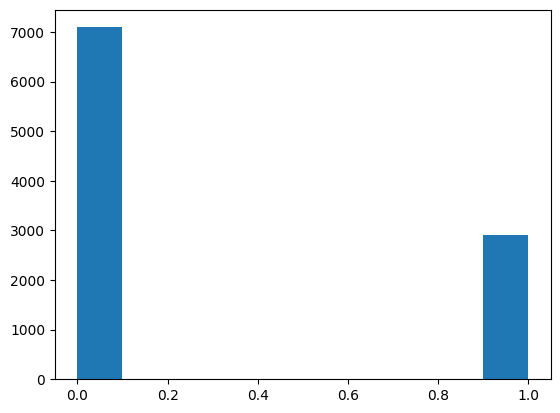

In [38]:
# 4. Verification to show that the adjustment did not alter the data too dramatically 
plt.hist(medical_data['Anxiety'])

In [39]:
# 5. Verification of Mean and median 
anxiety_average = medical_data['Anxiety'].mean()
anxiety_median = medical_data['Anxiety'].median()
print("Anxiety average", anxiety_average)
print("Anxiety median", anxiety_median)

Anxiety average 0.2906
Anxiety median 0.0


(array([2288., 1429.,  599.,  134.,   32.,  235.,  502.,  916., 1314.,
        1495.]),
 array([ 1.00198092,  8.09993146, 15.197882  , 22.29583253, 29.39378307,
        36.49173361, 43.58968415, 50.68763469, 57.78558522, 64.88353576,
        71.9814863 ]),
 <BarContainer object of 10 artists>)

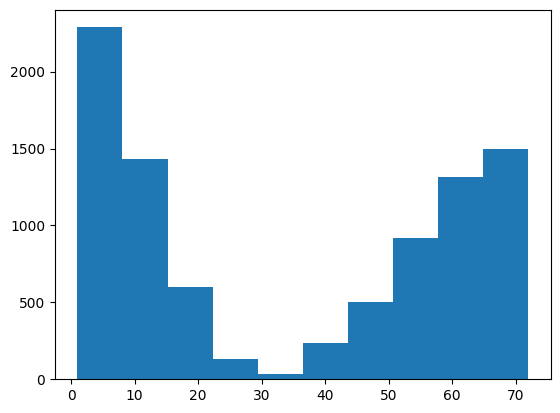

In [40]:
# Treat missing values
# 1. Examine Distribution 
plt.hist(medical_data['Initial_days'])

In [41]:
# 2. Examine Mean and median 
overweight_average = medical_data['Initial_days'].mean()
overweight_median = medical_data['Initial_days'].median()
print("Initial_days average", overweight_average)
print("Initial_days median", overweight_median)

Initial_days average 34.432081888043044
Initial_days median 34.44694129


In [42]:
# 3. Perform imputation (bi-modal distribution - substitute with median) 
medical_data['Initial_days'].fillna(medical_data['Initial_days'].median(), inplace = True)

# 4. Verification to show that isnull values are 0 
medical_data['Initial_days'].isnull().sum()

0

(array([2288., 1429.,  599.,  134., 1088.,  235.,  502.,  916., 1314.,
        1495.]),
 array([ 1.00198092,  8.09993146, 15.197882  , 22.29583253, 29.39378307,
        36.49173361, 43.58968415, 50.68763469, 57.78558522, 64.88353576,
        71.9814863 ]),
 <BarContainer object of 10 artists>)

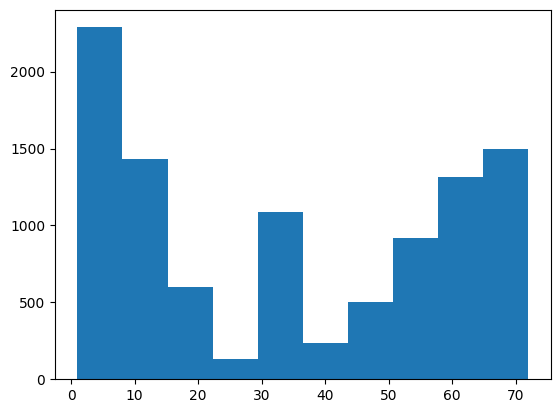

In [43]:
# 5. Verification to show that the adjustment did not alter the data too dramatically 
plt.hist(medical_data['Initial_days'])

In [44]:
# 6. Verification of Mean and median 
average_income = medical_data['Initial_days'].mean()
median_income = medical_data['Initial_days'].median()
print("Initial_days average", average_income)
print("Initial_days median", median_income)

Initial_days average 34.4336510408897
Initial_days median 34.44694129


<Axes: >

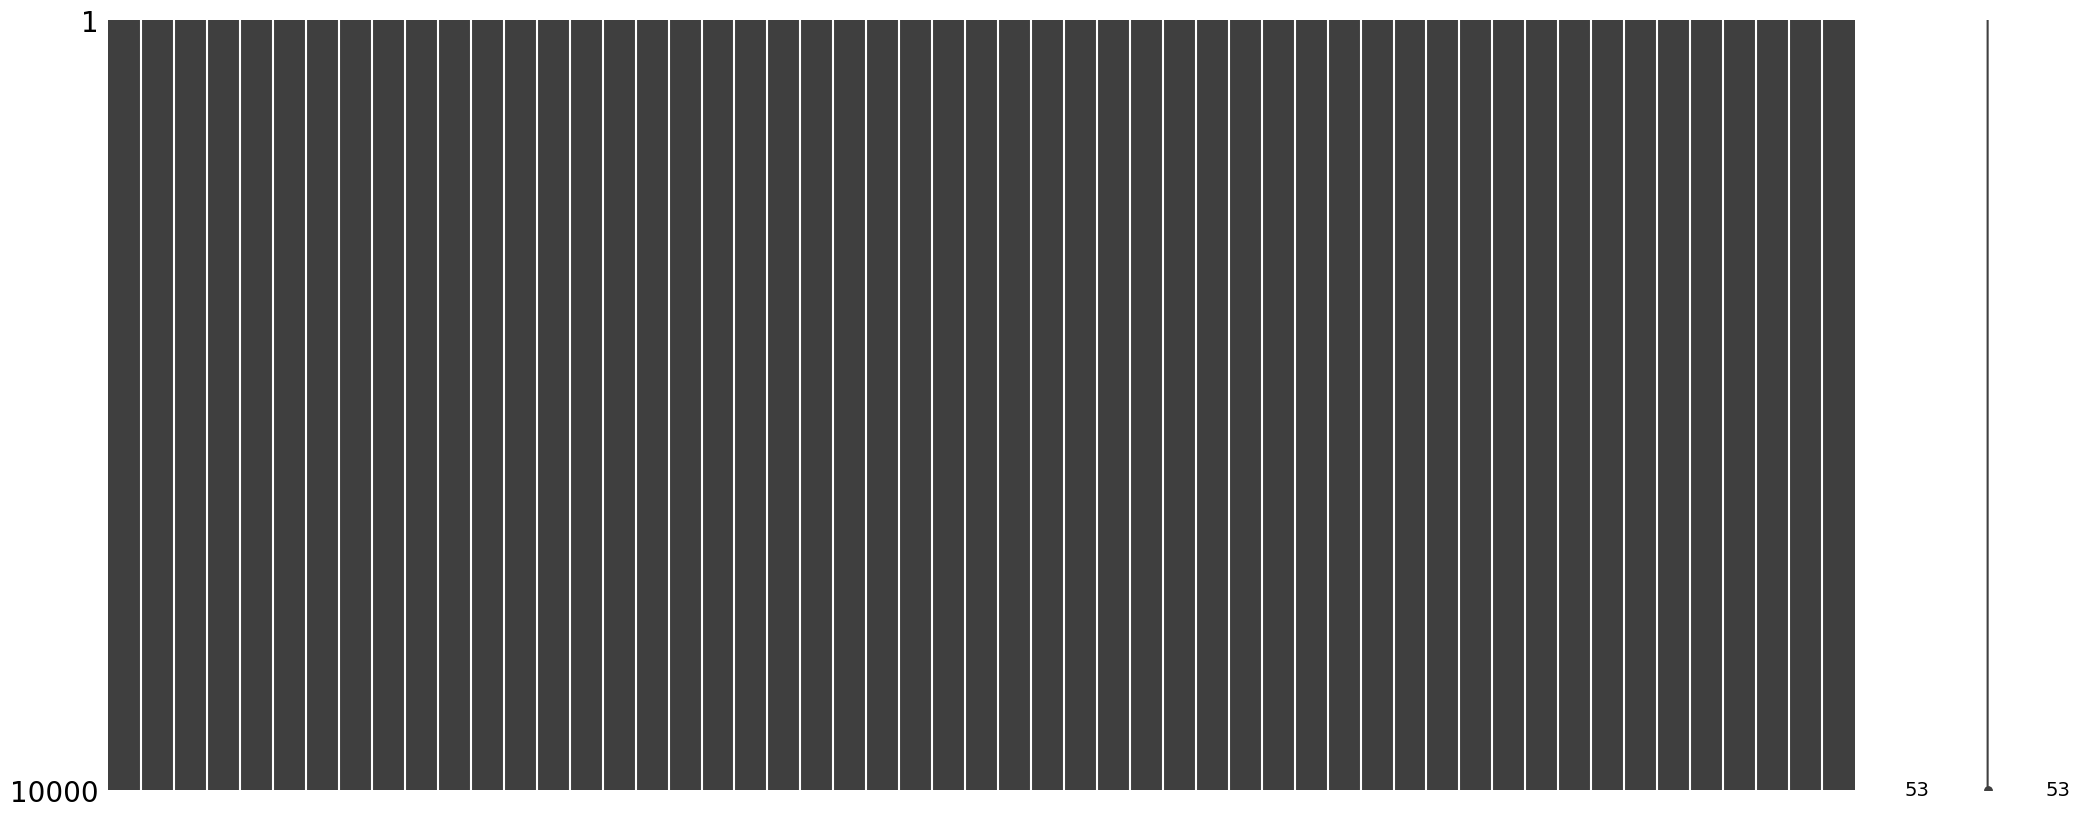

In [45]:
# Indicates no missing values
msno.matrix(medical_data)

__Outliers__ <br>
To look at the outliers we focus on all quantitative variables. There are 21 quantitative variables within this data set. <br>

Outliers were treated with the retain method. All outliers found were within reason and were not a preexisting error, therefore all outliers were kept and not treated. Out of the 21 quantitative variables 17 variables had outliers. All outlier values were listed above in D1 with the boxplots. Below is a detailed explanation for each variable that has outliers: 

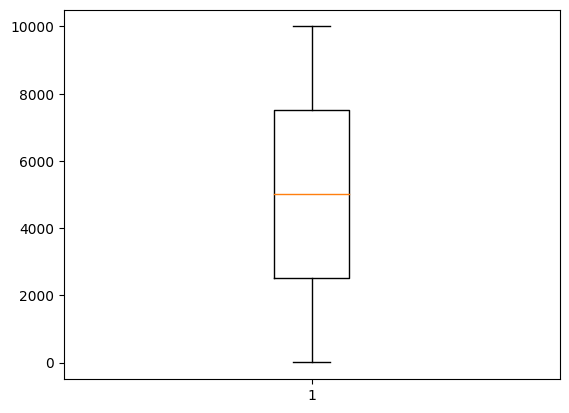

In [46]:
# Box plots for all quantitative variables (21 variables)
CaseOrderPlot = plt.boxplot(x='CaseOrder', data = medical_data)

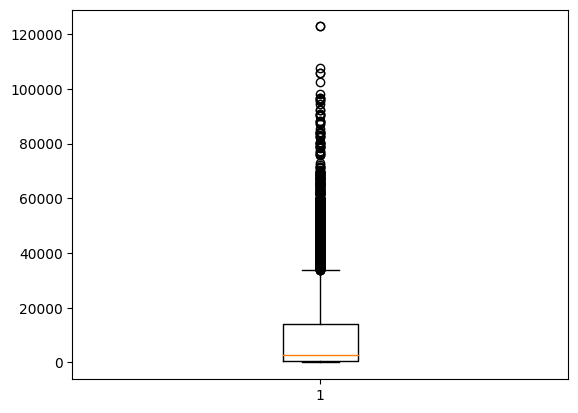

In [47]:
PopulationPlot = plt.boxplot(x='Population', data = medical_data)

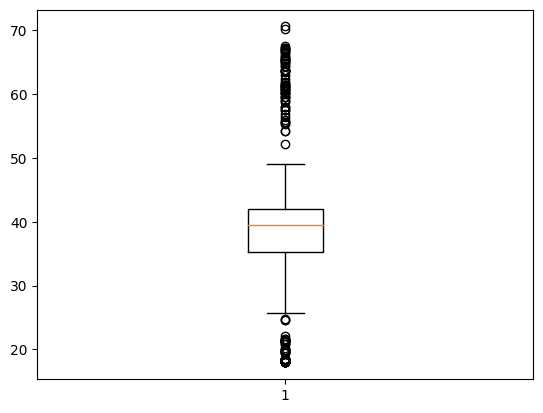

In [48]:
Lat = plt.boxplot(x='Lat', data = medical_data)

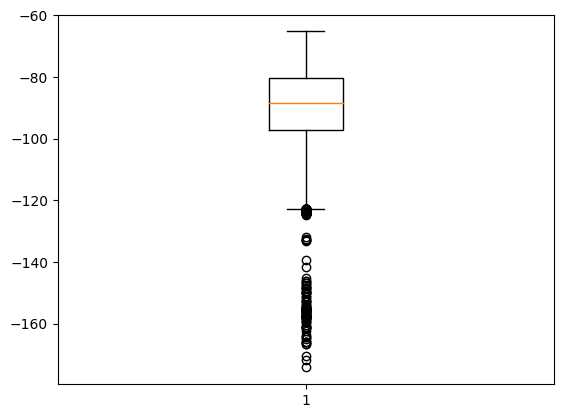

In [49]:
Lng = plt.boxplot(x='Lng', data = medical_data)

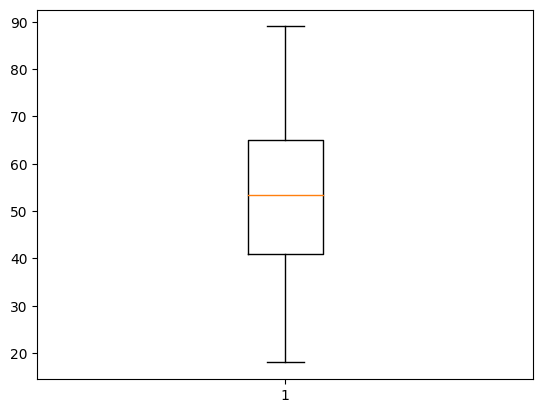

In [50]:
Age = plt.boxplot(x='Age', data = medical_data)

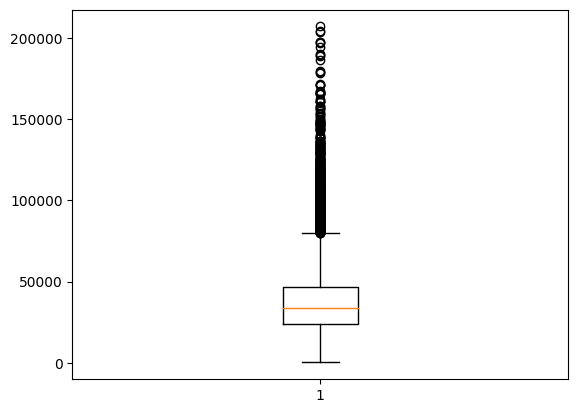

In [51]:
Income = plt.boxplot(x='Income', data = medical_data)

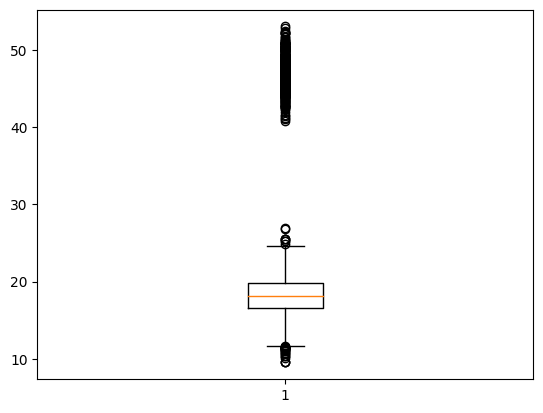

In [52]:
VitD_levels = plt.boxplot(x='VitD_levels', data = medical_data)

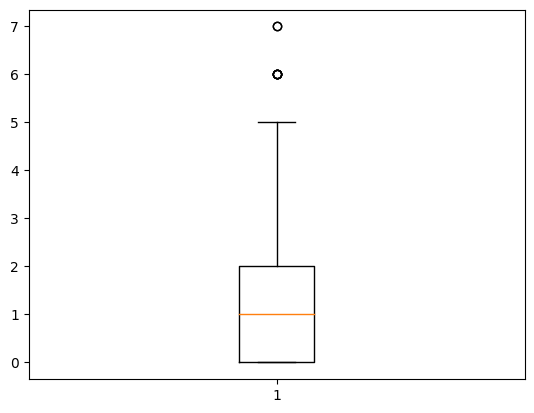

In [53]:
Full_meals_eaten = plt.boxplot(x='Full_meals_eaten', data = medical_data)

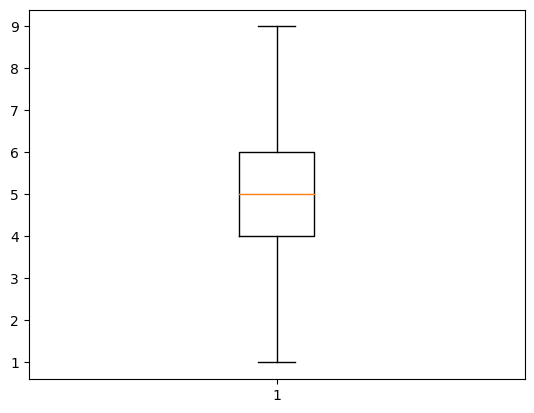

In [54]:
Doc_visits = plt.boxplot(x='Doc_visits', data = medical_data)

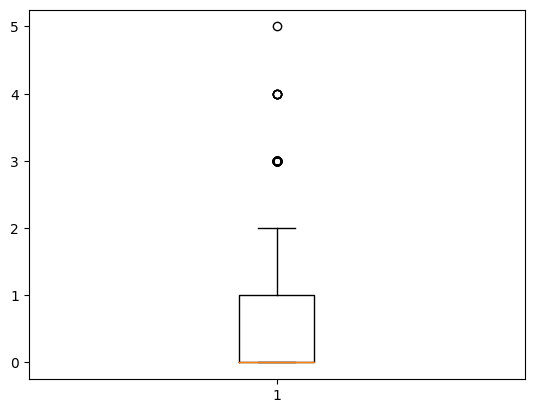

In [55]:
VitD_supp = plt.boxplot(x='VitD_supp', data = medical_data)        

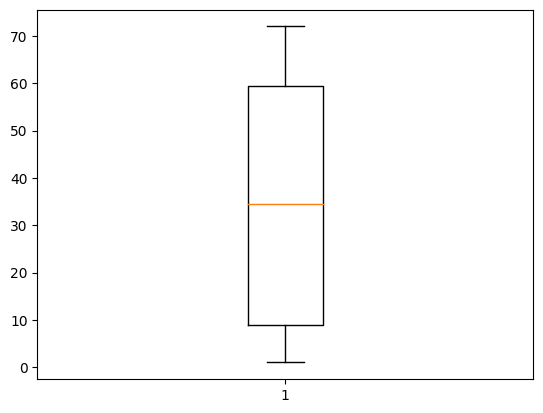

In [56]:
Initial_days = plt.boxplot(x='Initial_days', data = medical_data)

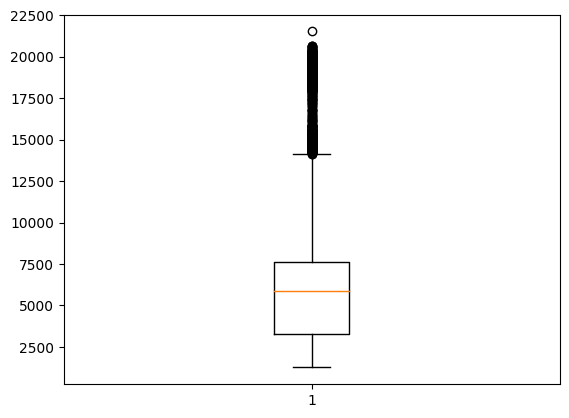

In [57]:
TotalCharge = plt.boxplot(x='TotalCharge', data = medical_data)

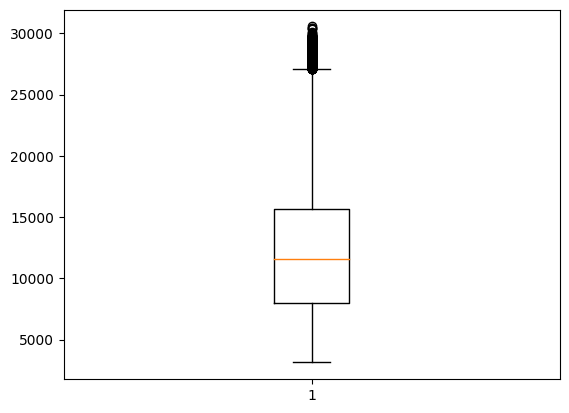

In [58]:
Additional_charges = plt.boxplot(x='Additional_charges', data = medical_data)

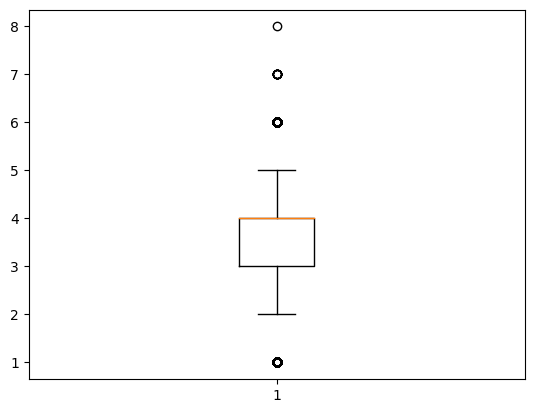

In [59]:
Item1 = plt.boxplot(x='Item1', data = medical_data)

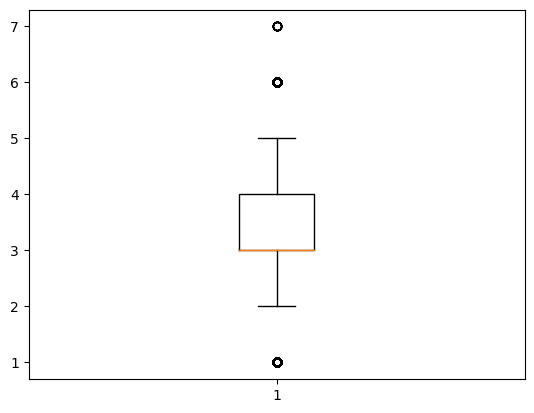

In [60]:
Item2 = plt.boxplot(x='Item2', data = medical_data)

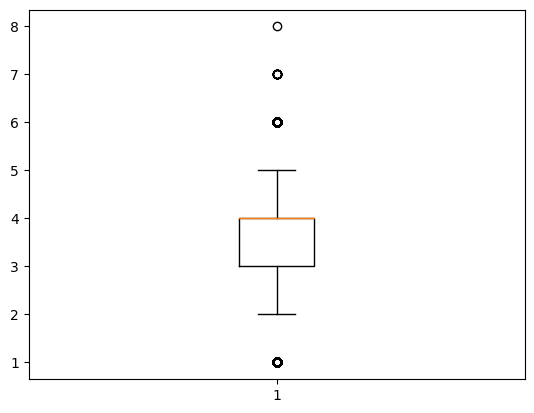

In [61]:
Item3 = plt.boxplot(x='Item3', data = medical_data)

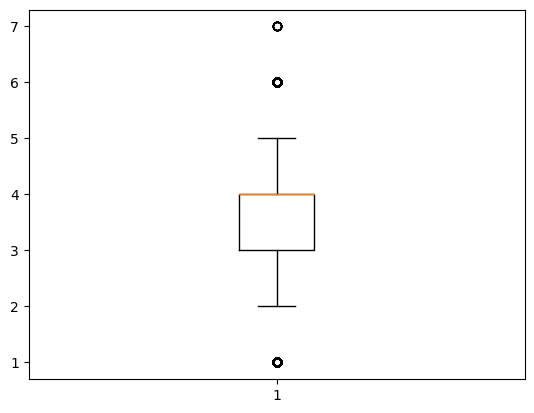

In [62]:
Item4 = plt.boxplot(x='Item4', data = medical_data)

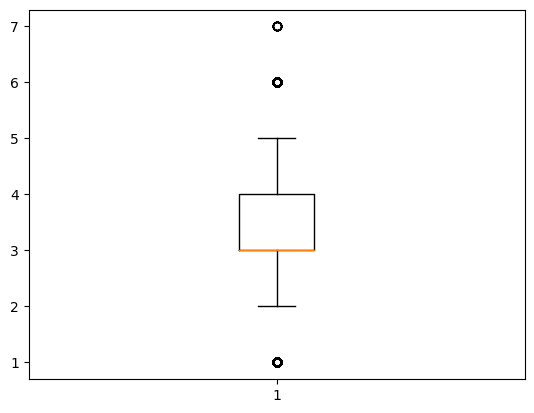

In [63]:
Item5 = plt.boxplot(x='Item5', data = medical_data)

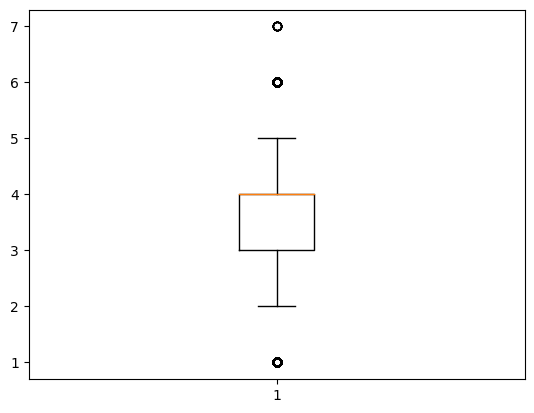

In [64]:
Item6 = plt.boxplot(x='Item6', data = medical_data)

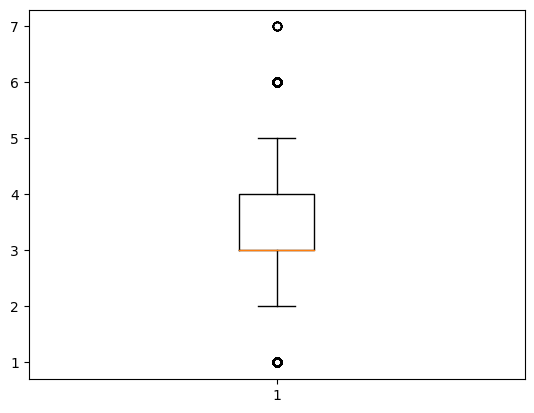

In [65]:
Item7 = plt.boxplot(x='Item7', data = medical_data)

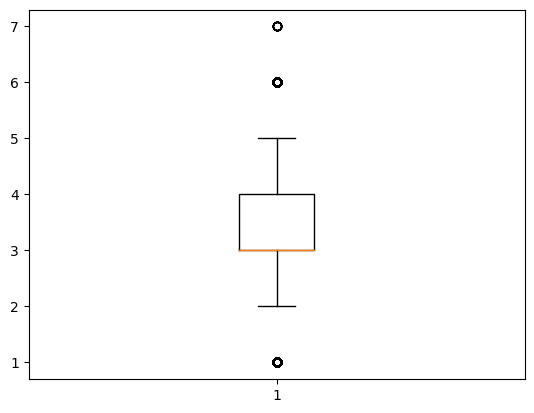

In [66]:
Item8 = plt.boxplot(x='Item8', data = medical_data)

__Re-expression__<br>
The re-expression of categorical variables begins with the discovery of 13 categorical or qualitative variables that have only 2 unique values (yes or no). <br>

The re-expression of categorical variables was completed through ordinal encoding. Ordinal encoding uses the Likert scale to transform categorical variables into numerical variables based on a specific order. (presentation) This also goes for values Boolean values like yes or no which represent 1 and 0 respectively. Due to variables overweight and anxiety having nominal values, it is best to stay consistent and change the remaining Boolean variables from categorical to nominal. The 11 variables with Boolean variables were found and re-expressed using a dictionary where yes is 1 and no is 0.

In [67]:
# Re-expression of categorical values
medical_data_qual = medical_data.select_dtypes(include= 'object')
un_medical = medical_data_qual.nunique()
un_medical_filtered = un_medical[un_medical < 3]
print(un_medical_filtered)

ReAdmis               2
Soft_drink            2
HighBlood             2
Stroke                2
Arthritis             2
Diabetes              2
Hyperlipidemia        2
BackPain              2
Allergic_rhinitis     2
Reflux_esophagitis    2
Asthma                2
dtype: int64


In [68]:
# 1. Verify values are yes and no only 
medical_data.ReAdmis.unique()

array(['No', 'Yes'], dtype=object)

In [69]:
# 2. Create new column to input into 
medical_data['ReAdmis_numeric'] = medical_data['ReAdmis']

# 3. Create dictionary for the values 
dict_readmis = {"ReAdmis_numeric": {"No": 0, "Yes": 1}}
medical_data.replace(dict_readmis, inplace = True)

In [70]:
# 4. Verify substitution went through 
medical_data.ReAdmis_numeric.unique()

array([0, 1], dtype=int64)

In [71]:
# 1. Verify values are yes and no only 
medical_data.Soft_drink.unique()

array(['No', 'Yes'], dtype=object)

In [72]:
# 2. Create new column to input into 
medical_data['Soft_drink_numeric'] = medical_data['Soft_drink']

# 3. Create dictionary for the values 
dict_readmis = {"Soft_drink_numeric": {"No": 0, "Yes": 1}}
medical_data.replace(dict_readmis, inplace = True)

In [73]:
# 4. Verify substitution went through 
medical_data.Soft_drink_numeric.unique()

array([0, 1], dtype=int64)

In [74]:
# 1. Verify values are yes and no only 
medical_data.HighBlood.unique()

array(['Yes', 'No'], dtype=object)

In [75]:
# 2. Create new column to input into 
medical_data['HighBlood_numeric'] = medical_data['HighBlood']

# 3. Create dictionary for the values 
dict_readmis = {"HighBlood_numeric": {"No": 0, "Yes": 1}}
medical_data.replace(dict_readmis, inplace = True)

In [76]:
# 4. Verify substitution went through 
medical_data.HighBlood_numeric.unique()

array([1, 0], dtype=int64)

In [77]:
# 1. Verify values are yes and no only 
medical_data.Stroke.unique()

array(['No', 'Yes'], dtype=object)

In [78]:
# 2. Create new column to input into 
medical_data['Stroke_numeric'] = medical_data['Stroke']

# 3. Create dictionary for the values 
dict_readmis = {"Stroke_numeric": {"No": 0, "Yes": 1}}
medical_data.replace(dict_readmis, inplace = True)

In [79]:
# 4. Verify substitution went through 
medical_data.Stroke_numeric.unique()

array([0, 1], dtype=int64)

In [80]:
# 1. Verify values are yes and no only 
medical_data.Arthritis.unique()

array(['Yes', 'No'], dtype=object)

In [81]:
# 2. Create new column to input into 
medical_data['Arthritis_numeric'] = medical_data['Arthritis']

# 3. Create dictionary for the values 
dict_readmis = {"Arthritis_numeric": {"No": 0, "Yes": 1}}
medical_data.replace(dict_readmis, inplace = True)

In [82]:
# 4. Verify substitution went through 
medical_data.Arthritis_numeric.unique()

array([1, 0], dtype=int64)

In [83]:
# 1. Verify values are yes and no only 
medical_data.Diabetes.unique()

array(['Yes', 'No'], dtype=object)

In [84]:
# 2. Create new column to input into 
medical_data['Diabetes_numeric'] = medical_data['Diabetes']

# 3. Create dictionary for the values 
dict_readmis = {"Diabetes_numeric": {"No": 0, "Yes": 1}}
medical_data.replace(dict_readmis, inplace = True)

In [85]:
# 4. Verify substitution went through 
medical_data.Diabetes_numeric.unique()

array([1, 0], dtype=int64)

In [86]:
# 1. Verify values are yes and no only 
medical_data.Hyperlipidemia.unique()

array(['No', 'Yes'], dtype=object)

In [87]:
# 2. Create new column to input into 
medical_data['Hyperlipidemia_numeric'] = medical_data['Hyperlipidemia']

# 3. Create dictionary for the values 
dict_readmis = {"Hyperlipidemia_numeric": {"No": 0, "Yes": 1}}
medical_data.replace(dict_readmis, inplace = True)

In [88]:
# 4. Verify substitution went through 
medical_data.Hyperlipidemia_numeric.unique()

array([0, 1], dtype=int64)

In [89]:
# 1. Verify values are yes and no only 
medical_data.BackPain.unique()

array(['Yes', 'No'], dtype=object)

In [90]:
# 2. Create new column to input into 
medical_data['BackPain_numeric'] = medical_data['BackPain']

# 3. Create dictionary for the values 
dict_readmis = {"BackPain_numeric": {"No": 0, "Yes": 1}}
medical_data.replace(dict_readmis, inplace = True)

In [91]:
# 4. Verify substitution went through 
medical_data.BackPain_numeric.unique()

array([1, 0], dtype=int64)

In [92]:
# 1. Verify values are yes and no only 
medical_data.Allergic_rhinitis.unique()

array(['Yes', 'No'], dtype=object)

In [93]:
# 2. Create new column to input into 
medical_data['Allergic_rhinitis_numeric'] = medical_data['Allergic_rhinitis']

# 3. Create dictionary for the values 
dict_readmis = {"Allergic_rhinitis_numeric": {"No": 0, "Yes": 1}}
medical_data.replace(dict_readmis, inplace = True)

In [94]:
# 4. Verify substitution went through 
medical_data.Allergic_rhinitis_numeric.unique()

array([1, 0], dtype=int64)

In [95]:
# 1. Verify values are yes and no only 
medical_data.Reflux_esophagitis.unique()

array(['No', 'Yes'], dtype=object)

In [96]:
# 2. Create new column to input into 
medical_data['Reflux_esophagitis_numeric'] = medical_data['Reflux_esophagitis']

# 3. Create dictionary for the values 
dict_readmis = {"Reflux_esophagitis_numeric": {"No": 0, "Yes": 1}}
medical_data.replace(dict_readmis, inplace = True)

In [97]:
# 4. Verify substitution went through 
medical_data.Reflux_esophagitis_numeric.unique()

array([0, 1], dtype=int64)

In [98]:
# 1. Verify values are yes and no only 
medical_data.Asthma.unique()

array(['Yes', 'No'], dtype=object)

In [99]:
# 2. Create new column to input into 
medical_data['Asthma_numeric'] = medical_data['Asthma']

# 3. Create dictionary for the values 
dict_readmis = {"Asthma_numeric": {"No": 0, "Yes": 1}}
medical_data.replace(dict_readmis, inplace = True)

In [100]:
# 4. Verify substitution went through 
medical_data.Asthma_numeric.unique()

array([1, 0], dtype=int64)

__Exporting the data__

In [101]:
# Export CSV
medical_data.to_csv("C:/Users/Makayla Avendano/Desktop/medical_data_clean_PA.csv")

__Principal Component Analysis (PCA)__<br>
The variables I used for the PCA include all numerical values that were quantitative variable types originally.

In [102]:
# Principal Component Analysis (PCA) 
# Installing necessary packages 
import numpy as np
import sklearn
from sklearn.decomposition import PCA 
import seaborn as sns

In [103]:
# Create new data frame with quantitative variables 
pca_medical_data = medical_data[['Population', 'Doc_visits', 'Full_meals_eaten', 'VitD_supp', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Lat','Lng', 'Age', 'Income', 'VitD_levels', 'Initial_days', 'TotalCharge', 'Additional_charges']]

In [104]:
# Normalize Data 
pca_normalize = (pca_medical_data - pca_medical_data.mean())/pca_medical_data.std()

In [105]:
pca = PCA(n_components=pca_medical_data.shape[1])

In [106]:
pca.fit(pca_normalize)

PCA(n_components=20)

In [107]:
pca_normalize_final = pd.DataFrame(pca.transform(pca_normalize),columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10','PC11', 'PC12', 'PC13', 'PC14','PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20'])

In [108]:
# PCA Loadings - Matrix 
loadings = pd.DataFrame(pca.components_.T, 
columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10','PC11', 'PC12', 'PC13', 'PC14','PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20'],
index=pca_normalize.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Population,0.009230,0.024159,0.024759,-0.023944,0.630558,0.252450,0.214585,-0.296232,-0.054822,0.124840,-0.061455,0.075765,-0.597781,0.126624,-0.017390,-0.015429,-0.027752,-0.013528,-0.005610,-0.001651
Doc_visits,0.007169,-0.004294,-0.008068,0.012224,0.013378,0.203864,0.426417,0.424116,-0.702970,-0.075140,0.301576,-0.022797,0.062126,0.018606,-0.024527,0.007874,-0.010209,-0.003568,-0.001976,-0.000153
Full_meals_eaten,-0.000606,-0.010946,0.018321,0.037622,-0.106460,-0.365295,0.481594,-0.265824,0.310534,-0.074370,0.661999,0.068700,-0.056751,0.046457,-0.012662,0.001053,0.013792,-0.010078,0.000750,-0.001416
VitD_supp,-0.005119,0.032924,0.009239,0.011220,0.032047,0.446408,-0.168637,0.374818,0.369801,0.564384,0.413884,0.036827,0.016329,-0.029861,0.013772,-0.003336,0.010349,-0.006123,-0.000217,-0.001490
Item1,0.454825,-0.024332,0.294774,0.015441,0.005951,-0.014345,-0.000862,0.011600,0.006040,0.012886,-0.008227,-0.099206,0.013161,0.070831,-0.010352,0.082808,0.186992,0.047636,-0.803440,-0.004245
Item2,0.428569,-0.024483,0.291284,0.017015,0.015198,0.012603,-0.009909,-0.000332,0.001019,-0.005739,-0.002452,-0.150688,0.009521,0.130420,-0.061593,0.097152,0.623159,-0.074771,0.532069,-0.003316
Item3,0.395325,-0.024302,0.294322,0.015269,-0.014041,-0.007785,-0.018539,0.009145,0.025149,0.008337,0.011849,-0.212117,0.045768,0.200950,-0.239098,-0.428475,-0.623074,0.028882,0.193435,0.006467
Item4,0.151870,0.062665,-0.553380,-0.035795,0.012379,-0.000795,-0.020372,-0.027891,0.029540,0.038260,0.025654,-0.371111,0.035838,0.352065,-0.389844,0.482704,-0.107200,0.040376,-0.009683,0.000852
Item5,-0.189750,-0.070681,0.578568,0.033748,0.009850,-0.009952,0.002846,0.014898,0.002338,0.007531,-0.023039,0.122760,0.021022,-0.059938,-0.133533,0.695991,-0.298813,0.048976,0.095173,0.003975
Item6,0.410202,0.030998,-0.160616,-0.018886,-0.009084,0.004835,0.025925,-0.016171,-0.005684,0.003053,0.012160,-0.045338,-0.024675,-0.054409,0.795547,0.271310,-0.274321,0.008493,0.126229,-0.001943


In [109]:
# Eigenvalues and Scree Plot 
cov_matrix = np.dot(pca_normalize.T, pca_normalize) / pca_medical_data.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

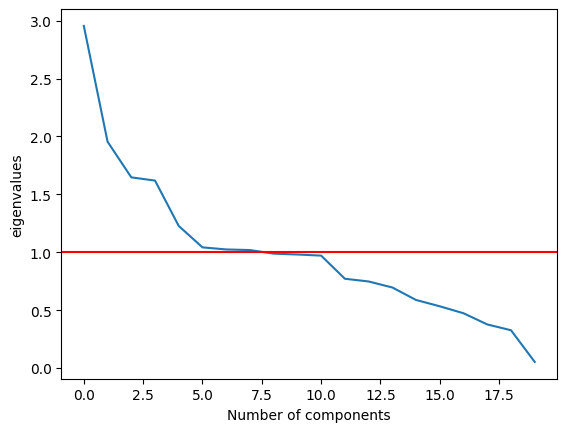

In [110]:
plt.plot(eigenvalues)
plt.xlabel('Number of components') 
plt.ylabel('eigenvalues')
plt.axhline(y=1, color="red")
plt.show()

The PCs that should be kept include PC1 through PC8. A scree plot is shown below to support the decision to keep PC1 through PC8 due to the intersection at 1 and 7.5. It makes more sense to round down to be more accurate and it’s important to remember that the scree plot starts at 0 which is the reason it is PC1 through PC8 instead of 7. Using the Kaiser rule that states to keep all principal components with an eigenvalue of 1 or higher, we can look at the scree plot and fix on the intersection of the red line at 1 and the eigenvalues in blue. Those values that are shown above the red line will be kept and the remaining will be removed. 